<div class="output_png output_subarea output_execute_result">
<center>
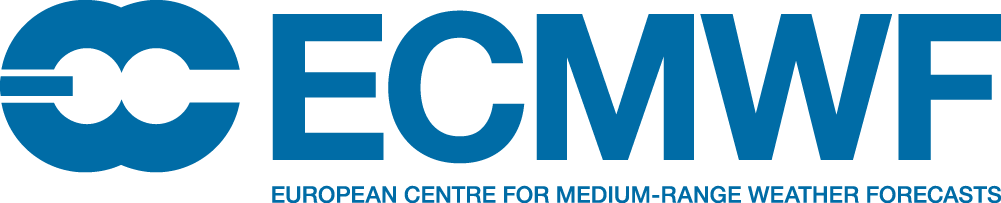</center>
</div>

# 	Divergence at various pressure levels

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-divergence

Access to ECMWF Open data is governed by the following [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).    

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 1 parameter:

* [Divergence](https://apps.ecmwf.int/codes/grib/param-db/?id=155)

In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data 
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> Skip this cell if you already have these libraries installed
</div>

In [2]:
import sys
!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

  Cloning https://github.com/ecmwf/ecmwf-geomaps.git to /tmp/pip-req-build-hbqz8b61
  Running command git clone --filter=blob:none -q https://github.com/ecmwf/ecmwf-geomaps.git /tmp/pip-req-build-hbqz8b61
  Resolved https://github.com/ecmwf/ecmwf-geomaps.git to commit a75e2c8063a57c6fa0e72d700f0d1e901286b56c
  Preparing metadata (setup.py) ... done


In [1]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [2]:
client = Client("https://ai4edataeuwest.blob.core.windows.net/ecmwf", beta=True)

In [2]:
parameters = ['d']
filename = 'medium-divergence.grib'
filename

'medium-divergence.grib'

In [4]:
client.retrieve(
    date=-2,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="pl",
    levelist=[1000,925,850,700,500,300,250,200,50],
    param=parameters,
    target=filename
)

## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [3]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [4]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
d,isobaricInhPa,"50,200,...",20220103,0,12,None,155,od,oper,fc,0001


We can use **ls()** function to list all the fields in the file we downloaded.

In [5]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,d,isobaricInhPa,200,20220103,0,12,fc,None,regular_ll
1,ecmf,d,isobaricInhPa,300,20220103,0,12,fc,None,regular_ll
2,ecmf,d,isobaricInhPa,850,20220103,0,12,fc,None,regular_ll
3,ecmf,d,isobaricInhPa,250,20220103,0,12,fc,None,regular_ll
4,ecmf,d,isobaricInhPa,1000,20220103,0,12,fc,None,regular_ll
5,ecmf,d,isobaricInhPa,700,20220103,0,12,fc,None,regular_ll
6,ecmf,d,isobaricInhPa,500,20220103,0,12,fc,None,regular_ll
7,ecmf,d,isobaricInhPa,50,20220103,0,12,fc,None,regular_ll
8,ecmf,d,isobaricInhPa,925,20220103,0,12,fc,None,regular_ll


In [6]:
data.describe('d')

shortName,d
name,Divergence
paramId,155
units,s**-1
typeOfLevel,isobaricInhPa
level,"50,200,250,300,500,700,850,925,1000"
date,20220103
time,0
step,12
number,None
class,od


The grib file contains all the levels, and we will use the **select()** function to filter one of them.

In [7]:
d300 = data.select(level= 300)
d300.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
d,isobaricInhPa,300,20220103,0,12,None,155,od,oper,fc,0001


And finally, we can plot the data on the map. 

Magics-warning: description is not a known keyword


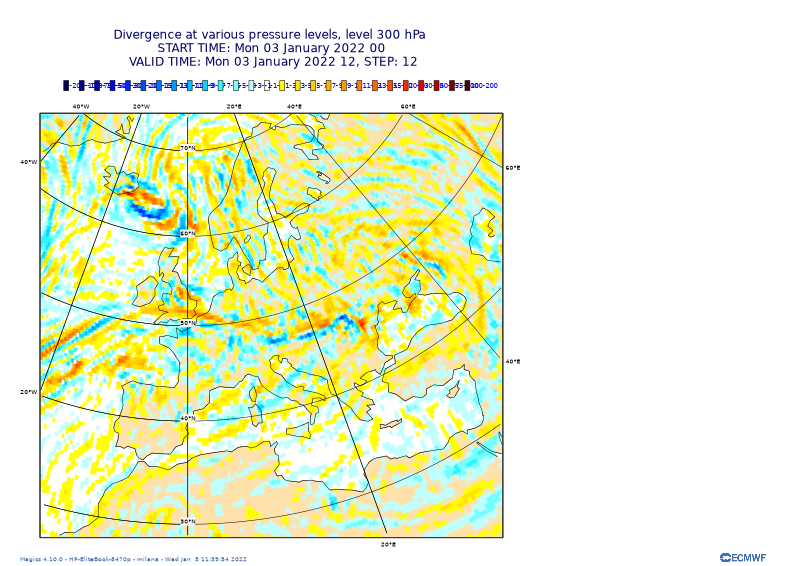

In [8]:
fig = GeoMap(area_name='europe', preset='background-foreground')

fig.contour_lines(d300, preset="sh_blured_fM50t50lst_cell")

fig.title(["Divergence at various pressure levels, level <grib_info key='level' /> hPa ",
          "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
          " VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step'/>"])

fig.show()